In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

file = './datasets/Ames Housing Dataset.xlsx'

housing = pd.read_excel(io = file)

housing.shape # row, column

print(housing.columns)

housing.head()
housing.info()

Index(['Order', 'Lot_Area', 'Street', 'Lot_Config', 'Neighborhood',
       'Overall_Qual', 'Overall_Cond', 'Mas_Vnr_Area', 'Total_Bsmt_SF',
       'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area', 'Full_Bath',
       'Half_Bath', 'Kitchen_AbvGr', 'TotRms_AbvGr', 'Fireplaces',
       'Garage_Cars', 'Garage_Area', 'Porch_Area', 'Pool_Area', 'Sale_Price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   Lot_Area       2930 non-null   int64  
 2   Street         2930 non-null   object 
 3   Lot_Config     2930 non-null   object 
 4   Neighborhood   2930 non-null   object 
 5   Overall_Qual   2930 non-null   int64  
 6   Overall_Cond   2930 non-null   int64  
 7   Mas_Vnr_Area   2907 non-null   float64
 8   Total_Bsmt_SF  2929 non-null   float64
 9   First_Flr_SF   2930 non-null

In [2]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  Sale_Price ~ Mas_Vnr_Area  +
                                                  Total_Bsmt_SF +
                                                  First_Flr_SF  +
                                                  Second_Flr_SF +
                                                  Garage_Area""",
                        data = housing)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1334.
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        21:33:07   Log-Likelihood:                -35177.
No. Observations:                2905   AIC:                         7.037e+04
Df Residuals:                    2899   BIC:                         7.040e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.83e+04   3020.193     -6.061

/Users/briankurniawan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'plt' is not defined

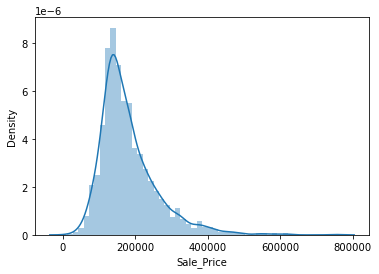

In [3]:
#develop a histogram to analyze the distribution of the Y-variable
sns.distplot(a = housing['Sale_Price'])

# displaying the histogram
plt.show()

In [4]:
#descriptive statistics
housing.describe(include = 'number').round(decimals = 2)

,Order,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price
count,2930.00,2930.00,2930.00,2930.00,2907.00,2929.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2929.00,2929.00,2930.00,2930.00,2930.00
mean,1465.50,10147.92,6.09,5.56,101.90,1051.61,1159.56,335.46,1499.69,1.57,0.38,1.04,6.44,0.60,1.77,472.82,182.89,2.24,180796.06
std,845.96,7880.02,1.41,1.11,179.11,440.62,391.89,428.40,505.51,0.55,0.50,0.21,1.57,0.65,0.76,215.05,159.83,35.60,79886.69
min,1.00,1300.00,1.00,1.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,12789.00
25%,733.25,7440.25,5.00,5.00,0.00,793.00,876.25,0.00,1126.00,1.00,0.00,1.00,5.00,0.00,1.00,320.00,48.00,0.00,129500.00
50%,1465.50,9436.50,6.00,5.00,0.00,990.00,1084.00,0.00,1442.00,2.00,0.00,1.00,6.00,1.00,2.00,480.00,165.00,0.00,160000.00
75%,2197.75,11555.25,7.00,6.00,164.00,1302.00,1384.00,703.75,1742.75,2.00,1.00,1.00,7.00,1.00,2.00,576.00,266.00,0.00,213500.00
max,2930.00,215245.00,10.00,9.00,1600.00,6110.00,5095.00,2065.00,5642.00,4.00,2.00,3.00,15.00,4.00,5.00,1488.00,1424.00,800.00,755000.00


CONTINUOUS
----------
Sale_Price (Y-variable)
Lot_Area
Mas_Vnr_Area
Total_Bsmt_SF
First_Flr_SF
Second_Flr_SF
Gr_Liv_Area
Garage_Area
Porch_Area
Pool_Area


INTERVAL/COUNT
--------------
Overall_Qual
Overall_Cond
Full_Bath
Half_Bath
Kitchen_AbvGr
TotRms_AbvGr
Fireplaces
Grarage Cars


CATEGORICAL
-----------
Street
Lot Config
Neighborhood
Order (not to be used in modeling)


Using the results above, complete the code below to analyze how the continuous variables in the dataset correlate to Sale_Price.


In [5]:
# creating a list of continuous features (including Sale_Price)
continuous_data = ['Sale_Price', 'Lot_Area', 'Mas_Vnr_Area',
                   'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF',
                   'Gr_Liv_Area', 'Garage_Area', 'Pool_Area']


# developing a correlation matrix based on continuous features
housing_corr = housing[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
housing_corr.loc[ : , 'Sale_Price'].round(decimals = 2).sort_values(ascending = False)

Sale_Price       1.00
Gr_Liv_Area      0.71
Garage_Area      0.64
Total_Bsmt_SF    0.63
First_Flr_SF     0.62
Mas_Vnr_Area     0.51
Second_Flr_SF    0.27
Lot_Area         0.27
Pool_Area        0.07
Name: Sale_Price, dtype: float64

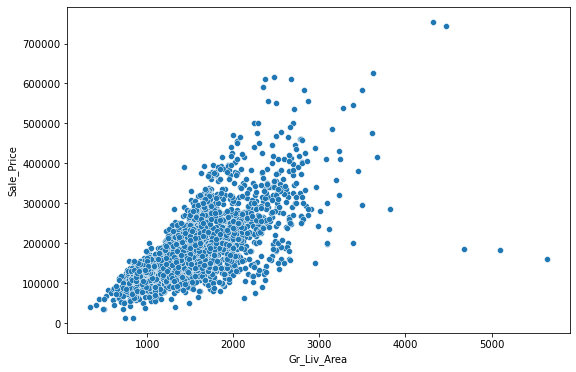

In [8]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = 'Gr_Liv_Area',
                y    = 'Sale_Price',
                data = housing)


# SHOWing the results
plt.show()

In [9]:
# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs

In [10]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """Sale_Price ~ Gr_Liv_Area""",
                  data = housing)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     2923.
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        21:37:55   Log-Likelihood:                -36218.
No. Observations:                2930   AIC:                         7.244e+04
Df Residuals:                    2928   BIC:                         7.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.329e+04   3269.703      4.064      

In [12]:
# log transforming Sale_Price and saving it to the dataset
housing['log_Sale_Price'] = np.log10(housing['Sale_Price'])

In [13]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_Sale_Price ~ Mas_Vnr_Area  +
                                                      Total_Bsmt_SF +
                                                      First_Flr_SF  +
                                                      Second_Flr_SF +
                                                      Garage_Area""",
                        data = housing)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sale_Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1227.
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        21:39:53   Log-Likelihood:                 2560.7
No. Observations:                2905   AIC:                            -5109.
Df Residuals:                    2899   BIC:                            -5073.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7741      0.007    692.721

In [15]:
#checking null values

housing.isnull().sum(axis = 0)

Order              0
Lot_Area           0
Street             0
Lot_Config         0
Neighborhood       0
Overall_Qual       0
Overall_Cond       0
Mas_Vnr_Area      23
Total_Bsmt_SF      1
First_Flr_SF       0
Second_Flr_SF      0
Gr_Liv_Area        0
Full_Bath          0
Half_Bath          0
Kitchen_AbvGr      0
TotRms_AbvGr       0
Fireplaces         0
Garage_Cars        1
Garage_Area        1
Porch_Area         0
Pool_Area          0
Sale_Price         0
log_Sale_Price     0
dtype: int64

In [16]:
# looping to detect features with missing values
for col in housing:

    # creating columns with 1s if missing and 0 if not
    if housing[col].isnull().astype(int).sum() > 0:
        housing['m_'+col] = housing[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
housing[    ['m_Mas_Vnr_Area', 'm_Total_Bsmt_SF',
             'm_Garage_Cars', 'm_Garage_Area']    ].sum(axis = 0)

m_Mas_Vnr_Area     23
m_Total_Bsmt_SF     1
m_Garage_Cars       1
m_Garage_Area       1
dtype: int64

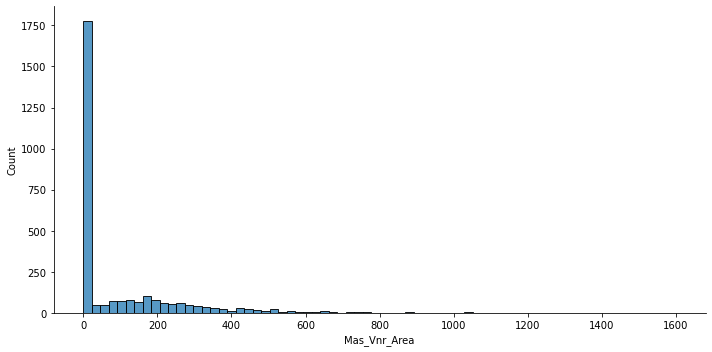

In [17]:
# creating a dropped dataset to visualize 'Mas Vnr Area'
df_dropped = housing.dropna()


# displaying the plot for 'Mas Vnr Area'
sns.displot(data = housing,
           x = 'Mas_Vnr_Area',
           height = 5,
           aspect = 2)
plt.show()

In [18]:
# instantiating an imputation value
fill = 0


# imputing 'Mas Vnr Area'
housing['Mas_Vnr_Area'] = housing['Mas_Vnr_Area'].fillna(fill)

In [19]:
# imputing everything else with the zero

# Total_Bsmt_SF
fill = 0
housing['Total_Bsmt_SF'] = housing['Total_Bsmt_SF'].fillna(fill)


# Garage_Cars
fill = 0
housing['Garage_Cars'] = housing['Garage_Cars'].fillna(fill)


# Garage_Area
fill = 0
housing['Garage_Area'] = housing['Garage_Area'].fillna(fill)

In [20]:
# making sure all missing values have been taken care of
housing.isnull().any().any()

False

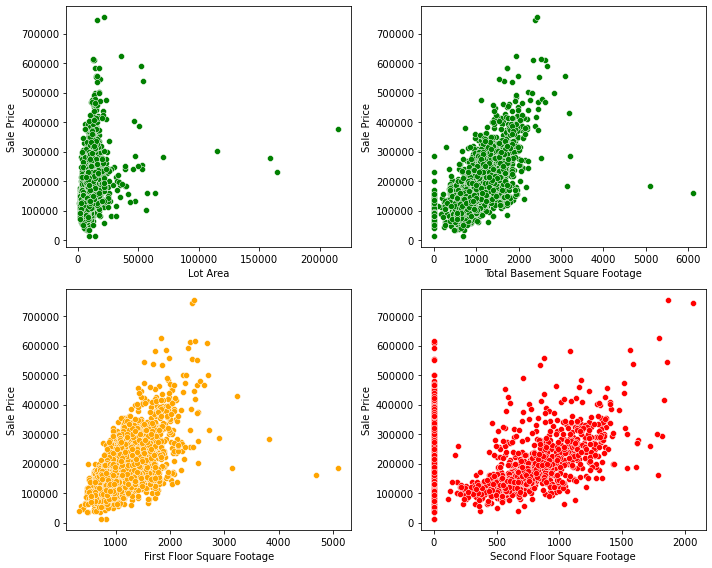

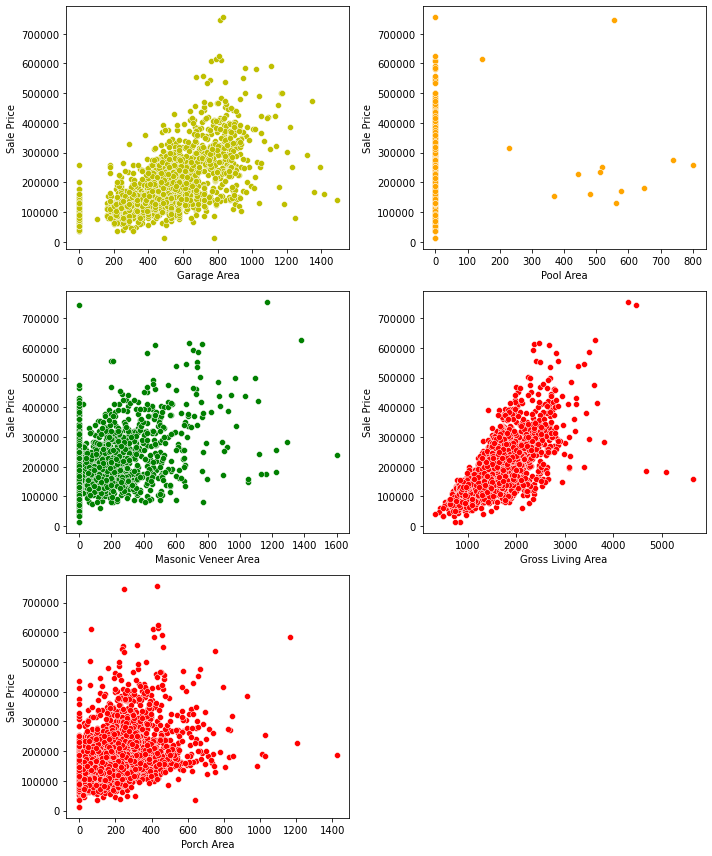

In [21]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = housing['Lot_Area'],
                y = housing['Sale_Price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Lot Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = housing['Total_Bsmt_SF'],
                y = housing['Sale_Price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Basement Square Footage')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = housing['First_Flr_SF'],
                y = housing['Sale_Price'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'First Floor Square Footage')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = housing['Second_Flr_SF'],
                y = housing['Sale_Price'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Second Floor Square Footage')
plt.ylabel(ylabel = 'Sale Price')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Housing Scatterplots 1 of 2.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = housing['Garage_Area'],
                y = housing['Sale_Price'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Garage Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = housing['Pool_Area'],
                y = housing['Sale_Price'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Pool Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = housing['Mas_Vnr_Area'],
                y = housing['Sale_Price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Masonic Veneer Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = housing['Gr_Liv_Area'],
                y = housing['Sale_Price'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Gross Living Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = housing['Porch_Area'],
                y = housing['Sale_Price'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Porch Area')
plt.ylabel(ylabel = 'Sale Price')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Housing Scatterplots 2 of 2.png')
plt.show()



In [22]:
# counting the number of zeroes
bsmt_zeroes   = len(housing['Total_Bsmt_SF'][housing['Total_Bsmt_SF'] == 0])
sf_zeroes     = len(housing['Second_Flr_SF'][housing['Second_Flr_SF'] == 0])
garage_zeroes = len(housing['Garage_Area'][housing['Garage_Area'] == 0])
pool_zeroes   = len(housing['Pool_Area'][housing['Pool_Area'] == 0])
mas_zeroes    = len(housing['Mas_Vnr_Area'][housing['Mas_Vnr_Area'] == 0])
porch_zeroes  = len(housing['Porch_Area'][housing['Porch_Area'] == 0])


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Basement       | {bsmt_zeroes}\t\t{len(housing) - bsmt_zeroes}
Second Floor   | {sf_zeroes}\t\t{len(housing) - sf_zeroes}
Garage         | {garage_zeroes}\t\t{len(housing) - garage_zeroes}
Pool           | {pool_zeroes}\t\t{len(housing) - pool_zeroes}
Masonic Veneer | {mas_zeroes}\t\t{len(housing) - mas_zeroes}
Porch          | {porch_zeroes}\t\t{len(housing) - porch_zeroes}
""")


                 No		Yes
               ---------------------
Basement       | 80		2850
Second Floor   | 1678		1252
Garage         | 158		2772
Pool           | 2917		13
Masonic Veneer | 1771		1159
Porch          | 484		2446



In [23]:
## dummy variable for having a basement.
housing['has_Basement']   = 0
housing['has_Second_Flr'] = 0
housing['has_Garage']     = 0
housing['has_Mas_Vnr']    = 0
housing['has_Porch']      = 0


for index, value in housing.iterrows():
    
    # Total_Bsmt_SF
    if housing.loc[index, 'Total_Bsmt_SF'] > 0:
        housing.loc[index, 'has_Basement'] = 1


    # Second_Flr_SF
    if housing.loc[index, 'Second_Flr_SF'] > 0:
        housing.loc[index, 'has_Second_Flr'] = 1
        
        
    # Garage_Area
    if housing.loc[index, 'Garage_Area'] > 0:
        housing.loc[index, 'has_Garage'] = 1
        
        
    # Mas_Vnr_Area
    if housing.loc[index, 'Mas_Vnr_Area'] > 0:
        housing.loc[index, 'has_Mas_Vnr'] = 1
        
        
    # Porch_Area
    if housing.loc[index, 'Porch_Area'] > 0:
        housing.loc[index, 'has_Porch'] = 1

In [24]:
# checking results
housing[['has_Basement', 'has_Second_Flr', 'has_Garage', 'has_Mas_Vnr', 'has_Porch']].head()

,has_Basement,has_Second_Flr,has_Garage,has_Mas_Vnr,has_Porch
0,1,0,1,1,1
1,1,0,1,0,1
2,1,0,1,1,1
3,1,0,1,0,0
4,1,1,1,0,1


In [25]:
# developing a small correlation matrix
zeroes_corr = housing.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['Sale_Price',                                   # Y-variable
               ['has_Basement', 'has_Second_Flr', 'has_Garage', # X-variables
                'has_Mas_Vnr', 'has_Porch']] \
                .sort_values(ascending = False)

has_Mas_Vnr       0.391982
has_Porch         0.256517
has_Garage        0.225840
has_Basement      0.154369
has_Second_Flr    0.089489
Name: Sale_Price, dtype: float64

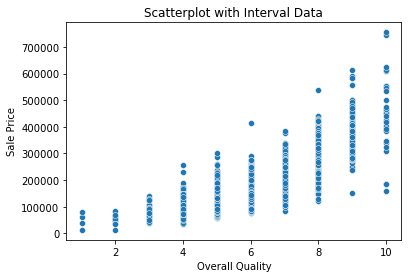

In [26]:
# developing a scatterplot
sns.scatterplot(x    = 'Overall_Qual',
                y    = 'Sale_Price',
                data = housing)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

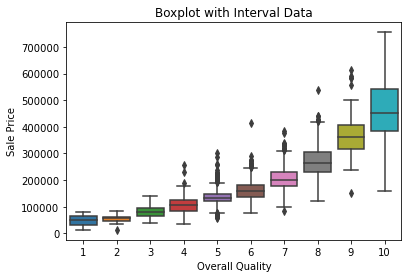

In [27]:
# developing a boxplot
sns.boxplot(x    = 'Overall_Qual',
            y    = 'Sale_Price',
            data = housing)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

In [28]:
housing['log_Overall_Qual'] = np.log10(housing['Overall_Qual'])


log_corr = housing.loc[ : , ['Overall_Qual',
                             'log_Overall_Qual',
                             'Sale_Price',
                             'log_Sale_Price']].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['Overall_Qual', 'log_Overall_Qual'],
              ['Sale_Price', 'log_Sale_Price']]

,Sale_Price,log_Sale_Price
Overall_Qual,0.80,0.83
log_Overall_Qual,0.74,0.81


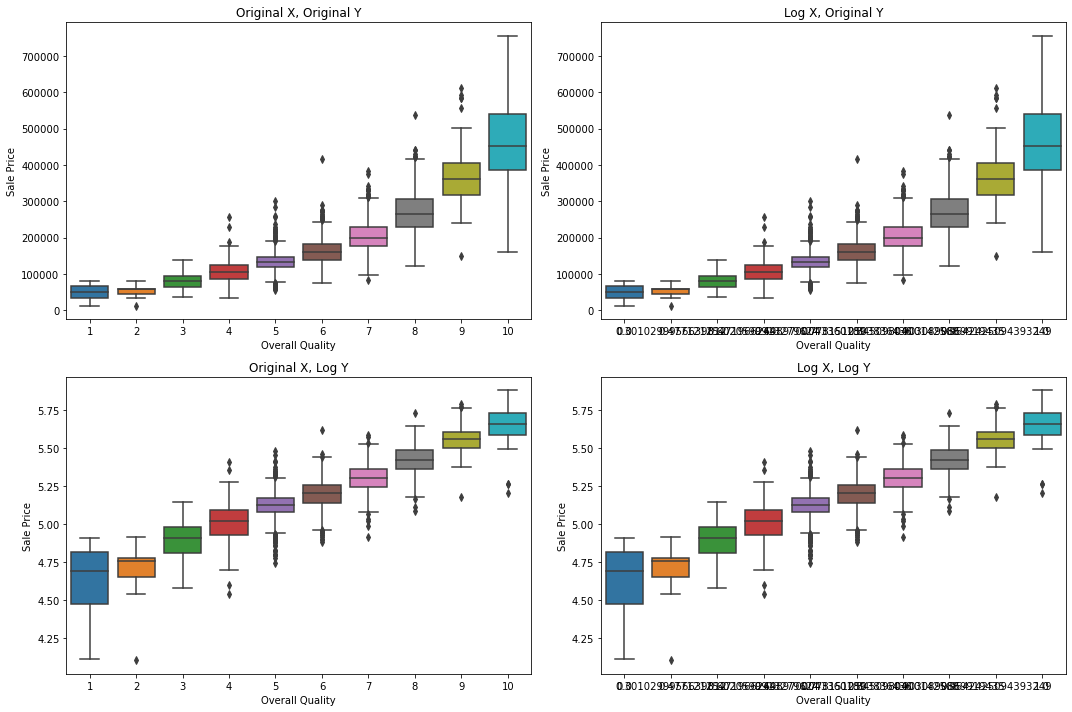

In [29]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'Overall_Qual',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_Overall_Qual',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'Overall_Qual',
            y     = 'log_Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = np.log10(housing['Overall_Qual']),
            y     = np.log10(housing['Sale_Price']),
            data  = housing)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


## displaying the visuals ##
plt.tight_layout()
plt.show()


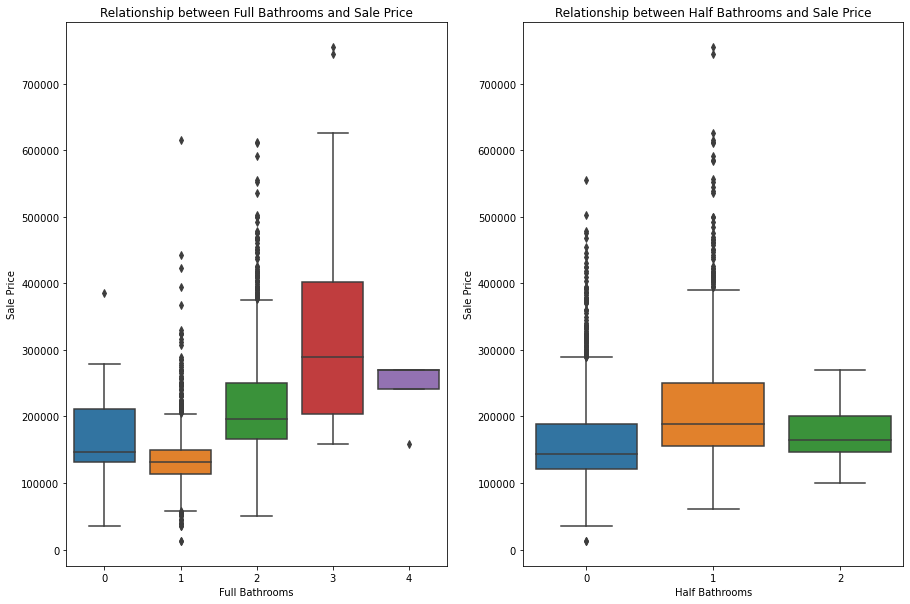


Count of Bathrooms

----------
Full Baths
----------
0      12
1    1318
2    1532
3      64
4       4
Name: Full_Bath, dtype: int64


----------
Half Baths
----------
0    1843
1    1062
2      25
Name: Half_Bath, dtype: int64





In [30]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## full baths ##

# first plot window
plt.subplot(1, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'Full_Bath',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Relationship between Full Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Full Bathrooms')
plt.ylabel(ylabel = 'Sale Price')



## half baths ##

# second plot window
plt.subplot(1, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'Half_Bath',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Relationship between Half Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Half Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for full and half baths
print(f"""
Count of Bathrooms
==================

----------
Full Baths
----------
{housing['Full_Bath'].value_counts(normalize = False).sort_index()}


----------
Half Baths
----------
{housing['Half_Bath'].value_counts(normalize = False).sort_index()}


""")

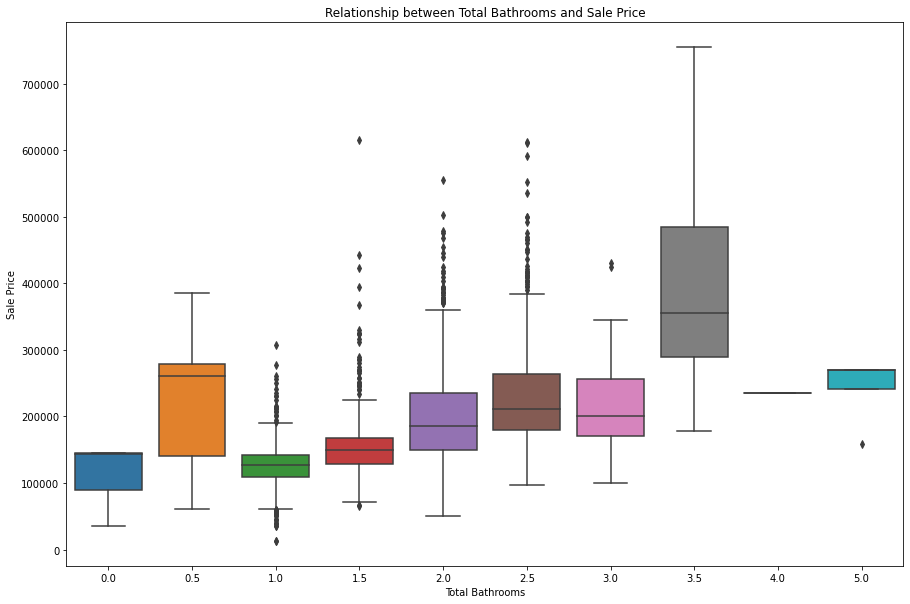


Bathrooms

-----------
Total Baths
-----------
0.0      3
0.5      5
1.0    951
1.5    365
2.0    869
2.5    659
3.0     40
3.5     33
4.0      1
5.0      4
Name: Total_Bath, dtype: int64


---------------------
Bathroom Correlations
---------------------
Full_Bath     0.55
Half_Bath     0.29
Total_Bath    0.58
Sale_Price    1.00
Name: Sale_Price, dtype: float64




In [31]:
# total bathrooms
housing['Total_Bath'] = (housing['Full_Bath'] + housing['Half_Bath'] / 2)

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_Bath',
            y    = 'Sale_Price',
            data = housing)



# titles and labels
plt.title(label   = 'Relationship between Total Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Total Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
bath_corr = housing.loc[ : , ['Full_Bath',
                              'Half_Bath',
                              'Total_Bath',
                              'Sale_Price']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Bathrooms
=========

-----------
Total Baths
-----------
{housing['Total_Bath'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{bath_corr['Sale_Price']}

""")

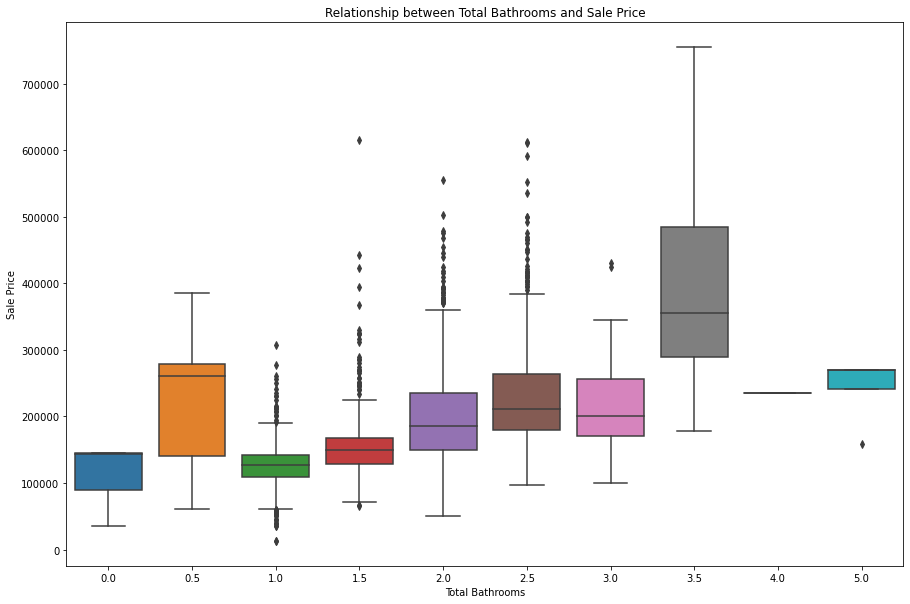


Bathrooms

-----------
Total Baths
-----------
0.0      3
0.5      5
1.0    951
1.5    365
2.0    869
2.5    659
3.0     40
3.5     33
4.0      1
5.0      4
Name: Total_Bath, dtype: int64


---------------------
Bathroom Correlations
---------------------
Full_Bath     0.55
Half_Bath     0.29
Total_Bath    0.58
Sale_Price    1.00
Name: Sale_Price, dtype: float64




In [32]:
# total bathrooms
housing['Total_Bath'] = (housing['Full_Bath'] + housing['Half_Bath'] / 2)

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_Bath',
            y    = 'Sale_Price',
            data = housing)



# titles and labels
plt.title(label   = 'Relationship between Total Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Total Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
bath_corr = housing.loc[ : , ['Full_Bath',
                              'Half_Bath',
                              'Total_Bath',
                              'Sale_Price']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Bathrooms
=========

-----------
Total Baths
-----------
{housing['Total_Bath'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{bath_corr['Sale_Price']}

""")

In [33]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

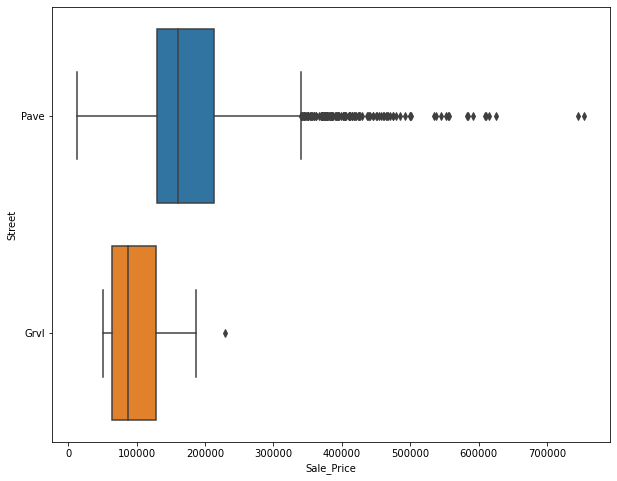

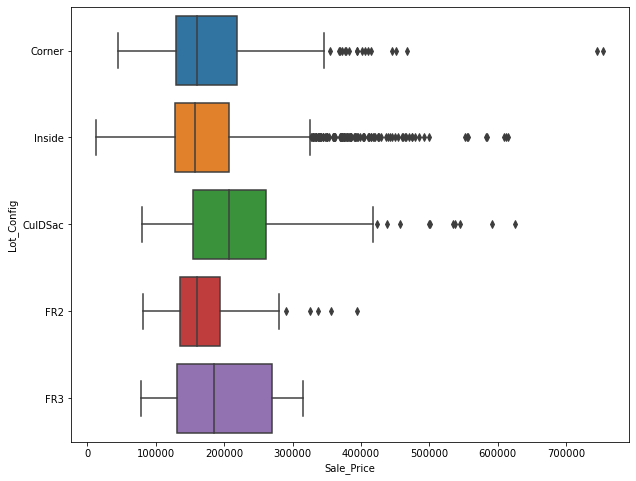

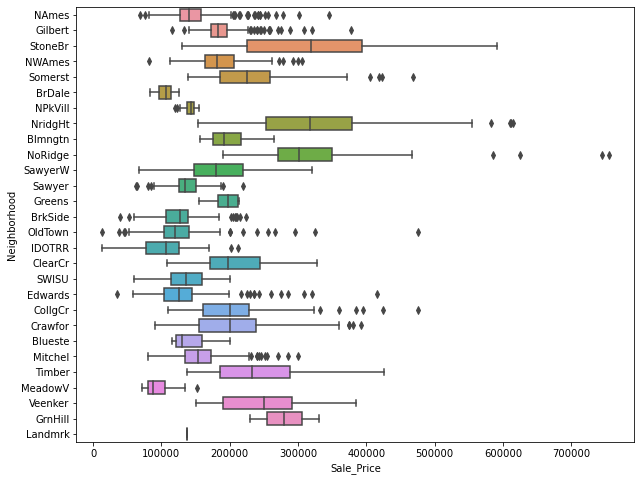

In [34]:
# calling the function for each categorical variable
# repeat the following code (once for each categorical variable)

#calling the function for Street
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Street',
					 data     = housing)


# calling the function for Lot_Config
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Lot_Config',
					 data     = housing)


# calling the function for Neighborhood
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Neighborhood',
					 data     = housing)


In [35]:
# one hot encoding categorical variables
one_hot_Street       = pd.get_dummies(housing['Street'])
one_hot_Lot          = pd.get_dummies(housing['Lot_Config'])
one_hot_Neighborhood = pd.get_dummies(housing['Neighborhood'])


# dropping categorical variables after they've been encoded
housing = housing.drop('Street', axis = 1)
housing = housing.drop('Lot_Config', axis = 1)
housing = housing.drop('Neighborhood', axis = 1)


# joining codings together
housing = housing.join([one_hot_Street, one_hot_Lot, one_hot_Neighborhood])


# saving new columns
new_columns = housing.columns

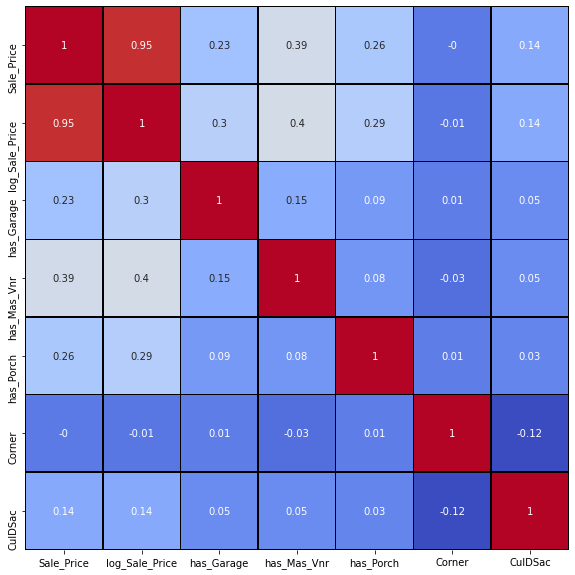

In [37]:
# correlation heatmap
df_corr = housing.corr().round(2)
# setting figure size
fig, ax = plt.subplots(figsize=(10,10))


# limiting the size of the correlation matrix
df_corr2 = df_corr.loc[ ['Sale_Price', 'log_Sale_Price', 'has_Garage',
                         'has_Mas_Vnr', 'has_Porch', 'Corner', 'CulDSac'],
                        ['Sale_Price', 'log_Sale_Price', 'has_Garage',
                         'has_Mas_Vnr', 'has_Porch', 'Corner', 'CulDSac']]


# visualizing the correlation matrix
sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)


# saving and displaying the correlation matrix
plt.savefig('Housing Correlation Heatmap.png')
plt.show()

In [38]:
# creating a (Pearson) correlation matrix
df_corr = housing.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['Sale_Price'].sort_values(ascending = False))

Sale_Price          1.00
log_Sale_Price      0.95
Overall_Qual        0.80
log_Overall_Qual    0.74
Gr_Liv_Area         0.71
                    ... 
BrkSide            -0.14
Edwards            -0.17
IDOTRR             -0.17
NAmes              -0.19
OldTown            -0.21
Name: Sale_Price, Length: 66, dtype: float64


In [39]:
# making a copy of housing
housing_explanatory = housing.copy()


# dropping SalePrice and Order from the explanatory variable set
housing_explanatory = housing.drop(['Order',
                                 'Sale_Price',
                                 'log_Sale_Price',
                                   'Grvl'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in housing_explanatory:
    print(val, '+')

Lot_Area +
Overall_Qual +
Overall_Cond +
Mas_Vnr_Area +
Total_Bsmt_SF +
First_Flr_SF +
Second_Flr_SF +
Gr_Liv_Area +
Full_Bath +
Half_Bath +
Kitchen_AbvGr +
TotRms_AbvGr +
Fireplaces +
Garage_Cars +
Garage_Area +
Porch_Area +
Pool_Area +
m_Mas_Vnr_Area +
m_Total_Bsmt_SF +
m_Garage_Cars +
m_Garage_Area +
has_Basement +
has_Second_Flr +
has_Garage +
has_Mas_Vnr +
has_Porch +
log_Overall_Qual +
Total_Bath +
Pave +
Corner +
CulDSac +
FR2 +
FR3 +
Inside +
Blmngtn +
Blueste +
BrDale +
BrkSide +
ClearCr +
CollgCr +
Crawfor +
Edwards +
Gilbert +
Greens +
GrnHill +
IDOTRR +
Landmrk +
MeadowV +
Mitchel +
NAmes +
NPkVill +
NWAmes +
NoRidge +
NridgHt +
OldTown +
SWISU +
Sawyer +
SawyerW +
Somerst +
StoneBr +
Timber +
Veenker +


In [40]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """Sale_Price ~ Lot_Area +
                                Overall_Qual +
                                Overall_Cond +
                                Mas_Vnr_Area +
                                Total_Bsmt_SF +
                                First_Flr_SF +
                                Second_Flr_SF +
                                Gr_Liv_Area +
                                Full_Bath +
                                Half_Bath +
                                Kitchen_AbvGr +
                                TotRms_AbvGr +
                                Fireplaces +
                                Garage_Cars +
                                Garage_Area +
                                Porch_Area +
                                Pool_Area +
                                m_Mas_Vnr_Area +
                                m_Total_Bsmt_SF +
                                m_Garage_Cars +
                                m_Garage_Area +
                                has_Basement +
                                has_Second_Flr +
                                has_Garage +
                                has_Mas_Vnr +
                                has_Porch +
                                log_Overall_Qual +
                                Total_Bath +
                                Grvl +
                                Pave +
                                Corner +
                                CulDSac +
                                FR2 +
                                FR3 +
                                Inside +
                                Blmngtn +
                                Blueste +
                                BrDale +
                                BrkSide +
                                ClearCr +
                                CollgCr +
                                Crawfor +
                                Edwards +
                                Gilbert +
                                Greens +
                                GrnHill +
                                IDOTRR +
                                Landmrk +
                                MeadowV +
                                Mitchel +
                                NAmes +
                                NPkVill +
                                NWAmes +
                                NoRidge +
                                NridgHt +
                                OldTown +
                                SWISU +
                                Sawyer +
                                SawyerW +
                                Somerst +
                                StoneBr +
                                Timber +
                                Veenker""",
                               data = housing)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     297.3
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        21:52:11   Log-Likelihood:                -34380.
No. Observations:                2930   AIC:                         6.888e+04
Df Residuals:                    2871   BIC:                         6.923e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.091e+04   6421.819      4.814      0.000    1.83e+04    4.35e+04
Lot_Area             0.3900      0.085      4.561      0.000       0.222       0.558
Overall_Qual      4.012e+04   2303.279     17.418      0.000    3.56e+04    4.46e+04
Overall_Cond      7261.3946    588.111     12.347      0.000    6108.232    8414.557
Mas_Vnr_Area        29.3639      5.050      5.814      0.000      19.461      39.267
Total_Bsmt_SF       21.9923      3.097      7.101      0.000      15.920      28.065
First_Flr_SF        40.2208     13.044      3.084      0.002      14.645      65.797
Second_Flr_SF       55.4443     13.402      4.137      0.000      29.166      81.723
Gr_Liv_Area         -3.1292     12.756     -0.245      0.806     -28.141      21.883
Full_Bath         1783.5268    889.459      2.005      0.045      39.485    3527.569
Half_Bath         2990.6804   1400.233      2.136      0.033     245.116    5736.244
Kitchen_AbvGr    -2.294e+04   3247.897     -7.063      0.000   -2.93e+04   -1.66e+04
TotRms_AbvGr       926.2260    683.704      1.355      0.176    -414.374    2266.826
Fireplaces        6748.4076   1105.895      6.102      0.000    4579.979    8916.836
Garage_Cars       9785.8415   1924.913      5.084      0.000    6011.490    1.36e+04
Garage_Area         17.1293      6.400      2.676      0.007       4.579      29.679
Porch_Area          25.7622      4.553      5.659      0.000      16.835      34.689
Pool_Area          -11.7055     16.394     -0.714      0.475     -43.850      20.439
m_Mas_Vnr_Area    6571.6510   6533.742      1.006      0.315   -6239.650    1.94e+04
m_Total_Bsmt_SF  -5749.4611    3.2e+04     -0.180      0.858   -6.85e+04    5.71e+04
m_Garage_Cars     6770.0715   1.54e+04      0.439      0.660   -2.34e+04     3.7e+04
m_Garage_Area     6770.0715   1.54e+04      0.439      0.660   -2.34e+04     3.7e+04
has_Basement     -1658.4048   5061.536     -0.328      0.743   -1.16e+04    8266.208
has_Second_Flr   -2.036e+04   3218.259     -6.325      0.000   -2.67e+04    -1.4e+04
has_Garage       -1.526e+04   3378.947     -4.516      0.000   -2.19e+04   -8633.105
has_Mas_Vnr      -6461.9786   1789.062     -3.612      0.000   -9969.954   -2954.003
has_Porch        -4441.4504   1878.083     -2.365      0.018   -8123.978    -758.922
log_Overall_Qual -3.234e+05   2.78e+04    -11.648      0.000   -3.78e+05   -2.69e+05
Total_Bath        3278.8670    957.877      3.423      0.001    1400.671    5157.063
Grvl              6100.2371   6576.058      0.928      0.354   -6794.036     1.9e+04
Pave              2.481e+04   4501.541      5.512      0.000     1.6e+04    3.36e+04
Corner            4097.6007   2391.368      1.713      0.087    -591.372    8786.573
CulDSac           1.475e+04   2849.646      5.175      0.000    9158.593    2.03e+04
FR2                 52.

Goals
Adjusted R-square of 0.825 or higher
All p-values in model < 0.05

In [42]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

In [43]:
# preparing explanatory variable data
housing_data = housing.drop(['Sale_Price',
                               'log_Sale_Price',
                               'Order'],
                               axis = 1)


# preparing response variables
housing_target = housing.loc[ : , 'Sale_Price']
log_housing_target = housing.loc[ : , 'log_Sale_Price']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            housing_data,
            housing_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (2197, 63)
y-side: (2197,)


Testing Data
------------
X-side: (733, 63)
y-side: (733,)



In [44]:
# merging X_train and y_train so that they can be used in statsmodels
housing_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """Sale_Price ~ Garage_Cars +
                                            Overall_Qual +
                                            Total_Bsmt_SF +
                                            NridgHt +
                                            Kitchen_AbvGr +
                                            has_Second_Flr +
                                            Mas_Vnr_Area +
                                            has_Garage +
                                            Porch_Area +
                                            NWAmes +
                                            OldTown +
                                            Overall_Cond +
                                            NAmes +
                                            Edwards +
                                            Lot_Area +
                                            Somerst +
                                            Fireplaces +
                                            Second_Flr_SF +
                                            has_Basement +
                                            First_Flr_SF +
                                            has_Mas_Vnr +
                                            CulDSac +
                                            Total_Bath +
                                            Crawfor +
                                            Garage_Area +
                                            has_Porch""",
                                data = housing_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     399.0
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        21:57:00   Log-Likelihood:                -25983.
No. Observations:                2197   AIC:                         5.202e+04
Df Residuals:                    2170   BIC:                         5.217e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.273e+04   9621.606     -2.

In [46]:
# declaring set of x-variables
x_variables = ['Garage_Cars', 'Overall_Qual', 'Total_Bsmt_SF',
               'NridgHt', 'Kitchen_AbvGr', 'has_Second_Flr',
               'Mas_Vnr_Area', 'has_Garage', 'Porch_Area',
               'NWAmes', 'OldTown', 'Overall_Cond', 'NAmes',
               'Edwards', 'Lot_Area', 'Somerst', 'Fireplaces',
               'Second_Flr_SF', 'has_Basement', 'First_Flr_SF',
               'has_Mas_Vnr', 'CulDSac', 'Total_Bath',
               'Crawfor', 'Garage_Area', 'has_Porch']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

Garage_Cars +
Overall_Qual +
Total_Bsmt_SF +
NridgHt +
Kitchen_AbvGr +
has_Second_Flr +
Mas_Vnr_Area +
has_Garage +
Porch_Area +
NWAmes +
OldTown +
Overall_Cond +
NAmes +
Edwards +
Lot_Area +
Somerst +
Fireplaces +
Second_Flr_SF +
has_Basement +
First_Flr_SF +
has_Mas_Vnr +
CulDSac +
Total_Bath +
Crawfor +
Garage_Area +
has_Porch +


In [47]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = housing[x_variables]


# preparing response variable
housing_target = housing['Sale_Price']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            housing_data,     # x-variables
            housing_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            housing_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [48]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test, y_test).round(4)) # using R-square

#saving scoring results
lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score = lr.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.8534
OLS Testing Score  : 0.8596
OLS Train-Test Gap : 0.0062


In [49]:
# zipping each feature name to its coefficient
lr_model_values = zip(housing_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 31784.48)
('Garage_Cars', 0.53)
('Overall_Qual', 36724.36)
('Total_Bsmt_SF', 7111.78)
('NridgHt', 30.85)
('Kitchen_AbvGr', 15.28)
('has_Second_Flr', 32.31)
('Mas_Vnr_Area', 41.88)
('has_Garage', 0.2)
('Porch_Area', 2272.06)
('NWAmes', 3289.32)
('OldTown', -20063.52)
('Overall_Cond', 1945.02)
('NAmes', 6672.87)
('Edwards', 10086.24)
('Lot_Area', 20.88)
('Somerst', 28.31)
('Fireplaces', -46.12)
('Second_Flr_SF', 11117.53)
('has_Basement', -0.0)
('First_Flr_SF', 9945.71)
('has_Mas_Vnr', 9945.71)
('CulDSac', 3449.6)
('Total_Bath', -18713.89)
('Crawfor', -15317.27)
('Garage_Area', -5541.26)
('has_Porch', -3670.45)


In [50]:
import sklearn.linear_model

In [51]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.8533
Lasso Testing Score  : 0.8591
Lasso Train-Test Gap : 0.0058


In [52]:
# zipping each feature name to its coefficient
lasso_model_values = zip(housing_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 32837.09)
('Lot_Area', 0.54)
('Overall_Qual', 35267.82)
('Overall_Cond', 6910.31)
('Mas_Vnr_Area', 30.32)
('Total_Bsmt_SF', 15.71)
('First_Flr_SF', 26.13)
('Second_Flr_SF', 34.8)
('Gr_Liv_Area', 6.33)
('Full_Bath', 0.0)
('Half_Bath', 2194.02)
('Kitchen_AbvGr', -19986.87)
('TotRms_AbvGr', 1835.01)
('Fireplaces', 6595.34)
('Garage_Cars', 10113.54)
('Garage_Area', 20.96)
('Porch_Area', 27.98)
('Pool_Area', -45.04)
('m_Mas_Vnr_Area', 10859.78)
('m_Total_Bsmt_SF', 0.0)
('m_Garage_Cars', 17512.94)
('m_Garage_Area', 0.0)
('has_Basement', 1844.51)
('has_Second_Flr', -17702.5)
('has_Garage', -15177.12)
('has_Mas_Vnr', -5130.41)
('has_Porch', -3420.58)
('log_Overall_Qual', -259633.48)
('Total_Bath', 6335.81)
('Grvl', -21599.67)
('Pave', 0.0)
('Corner', -3164.87)
('CulDSac', 9002.17)
('FR2', -9157.67)
('FR3', -6655.34)
('Inside', 0.0)
('Blmngtn', 5949.75)
('Blueste', -18506.73)
('BrDale', -18817.84)
('BrkSide', -7362.01)
('ClearCr', 0.0)
('CollgCr', 10434.11)
('Crawfor', 19629.89)
(

In [53]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 32837.09)
('Lot_Area', 0.54)
('Overall_Qual', 35267.82)
('Overall_Cond', 6910.31)
('Mas_Vnr_Area', 30.32)
('Total_Bsmt_SF', 15.71)
('First_Flr_SF', 26.13)
('Second_Flr_SF', 34.8)
('Gr_Liv_Area', 6.33)
('Half_Bath', 2194.02)
('Kitchen_AbvGr', -19986.87)
('TotRms_AbvGr', 1835.01)
('Fireplaces', 6595.34)
('Garage_Cars', 10113.54)
('Garage_Area', 20.96)
('Porch_Area', 27.98)
('Pool_Area', -45.04)
('m_Mas_Vnr_Area', 10859.78)
('m_Garage_Cars', 17512.94)
('has_Basement', 1844.51)
('has_Second_Flr', -17702.5)
('has_Garage', -15177.12)
('has_Mas_Vnr', -5130.41)
('has_Porch', -3420.58)
('log_Overall_Qual', -259633.48)
('Total_Bath', 6335.81)
('Grvl', -21599.67)
('Corner', -3164.87)
('CulDSac', 9002.17)
('FR2', -9157.67)
('FR3', -6655.34)
('Blmngtn', 5949.75)
('Blueste', -18506.73)
('BrDale', -18817.84)
('BrkSide', -7362.01)
('CollgCr', 10434.11)
('Crawfor', 19629.89)
('Edwards', -11573.08)
('Gilbert', 6893.39)
('Greens', -7602.0)
('GrnHill', 83157.04)
('IDOTRR', -18562.11)
('Meado

In [54]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False) # default magitude


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_train_FULL, y_train_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_train_FULL, y_train_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.8443
Testing Score : 0.8443
ARD Train-Test Gap : 0.0


In [55]:
# zipping each feature name to its coefficient
ard_model_values = zip(housing_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -43282.8)
('Lot_Area', 0.60066)
('Overall_Qual', 15667.21466)
('Overall_Cond', 5391.70739)
('Mas_Vnr_Area', 28.91845)
('Total_Bsmt_SF', 13.29001)
('First_Flr_SF', 38.39482)
('Second_Flr_SF', 48.58622)
('Gr_Liv_Area', 0.00047)
('Full_Bath', -1e-05)
('Half_Bath', 2734.30887)
('Kitchen_AbvGr', -21857.20496)
('TotRms_AbvGr', 835.27959)
('Fireplaces', 6639.15605)
('Garage_Cars', 11944.30398)
('Garage_Area', 20.44231)
('Porch_Area', 28.35094)
('Pool_Area', -36.22151)
('m_Mas_Vnr_Area', 0.00019)
('m_Total_Bsmt_SF', -0.0)
('m_Garage_Cars', 0.0)
('m_Garage_Area', 0.0)
('has_Basement', -0.00031)
('has_Second_Flr', -23696.40359)
('has_Garage', -19765.06633)
('has_Mas_Vnr', -5160.53783)
('has_Porch', -3871.1851)
('log_Overall_Qual', -0.00029)
('Total_Bath', 7090.45884)
('Grvl', -0.00022)
('Pave', 0.00022)
('Corner', 0.00013)
('CulDSac', 13125.10137)
('FR2', -0.0004)
('FR3', -4e-05)
('Inside', 3846.82195)
('Blmngtn', 0.00021)
('Blueste', -8e-05)
('BrDale', -0.00027)
('BrkSide', 0.0001

In [56]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -43282.8)
('Lot_Area', 0.60066)
('Overall_Qual', 15667.21466)
('Overall_Cond', 5391.70739)
('Mas_Vnr_Area', 28.91845)
('Total_Bsmt_SF', 13.29001)
('First_Flr_SF', 38.39482)
('Second_Flr_SF', 48.58622)
('Gr_Liv_Area', 0.00047)
('Full_Bath', -1e-05)
('Half_Bath', 2734.30887)
('Kitchen_AbvGr', -21857.20496)
('TotRms_AbvGr', 835.27959)
('Fireplaces', 6639.15605)
('Garage_Cars', 11944.30398)
('Garage_Area', 20.44231)
('Porch_Area', 28.35094)
('Pool_Area', -36.22151)
('m_Mas_Vnr_Area', 0.00019)
('m_Garage_Cars', 0.0)
('has_Basement', -0.00031)
('has_Second_Flr', -23696.40359)
('has_Garage', -19765.06633)
('has_Mas_Vnr', -5160.53783)
('has_Porch', -3871.1851)
('log_Overall_Qual', -0.00029)
('Total_Bath', 7090.45884)
('Grvl', -0.00022)
('Pave', 0.00022)
('Corner', 0.00013)
('CulDSac', 13125.10137)
('FR2', -0.0004)
('FR3', -4e-05)
('Inside', 3846.82195)
('Blmngtn', 0.00021)
('Blueste', -8e-05)
('BrDale', -0.00027)
('BrkSide', 0.00016)
('ClearCr', 6e-05)
('CollgCr', 13595.26198)
('

In [57]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.8534            0.8596
Lasso      0.8533           0.8591
ARD        0.8443           0.8443



In [58]:
prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = './model_results/linear_model_predictions.xlsx',
                            index = False)

In [60]:
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

In [61]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(housing_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(housing_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
count,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,...,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.12,-3.61,-4.11,-0.57,-2.38,-2.11,-0.78,-2.31,-2.83,-0.76,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
25%,-0.34,-0.78,-0.51,-0.57,-0.59,-0.72,-0.78,-0.74,-1.02,-0.76,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
50%,-0.09,-0.07,-0.51,-0.57,-0.14,-0.19,-0.78,-0.11,0.78,-0.76,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
75%,0.18,0.64,0.39,0.35,0.57,0.57,0.86,0.48,0.78,1.23,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
max,26.03,2.77,3.09,8.39,11.47,10.04,4.04,8.20,4.40,3.22,...,6.35,4.08,3.36,7.75,4.29,4.74,3.89,7.51,6.30,11.00


In [63]:
dataset_file     = './datasets/housing_feature_rich.xlsx'
performance_file = './model_results/linear_model_performance.xlsx'
prediction_file  = './model_results/linear_model_predictions.xlsx'


# reading the files into Python
housing     = pd.read_excel(dataset_file)
performance = pd.read_excel(performance_file)
predictions = pd.read_excel(prediction_file)

In [64]:
# checking pervious model performance
performance.head(n = 5)

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.8534,0.8596,0.0062,27,"[('intercept', 31784.48), ('Garage_Cars', 0.53..."
1,Lasso,0.8533,0.8591,0.0058,56,"[('intercept', 32837.09), ('Lot_Area', 0.54), ..."
2,ARD,0.8443,0.8443,0.0000,61,"[('intercept', -43282.8), ('Lot_Area', 0.60066..."


In [65]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(housing_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(housing_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
count,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,...,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.12,-3.61,-4.11,-0.57,-2.38,-2.11,-0.78,-2.31,-2.83,-0.76,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
25%,-0.34,-0.78,-0.51,-0.57,-0.59,-0.72,-0.78,-0.74,-1.02,-0.76,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
50%,-0.09,-0.07,-0.51,-0.57,-0.14,-0.19,-0.78,-0.11,0.78,-0.76,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
75%,0.18,0.64,0.39,0.35,0.57,0.57,0.86,0.48,0.78,1.23,...,-0.16,-0.25,-0.30,-0.13,-0.23,-0.21,-0.26,-0.13,-0.16,-0.09
max,26.03,2.77,3.09,8.39,11.47,10.04,4.04,8.20,4.40,3.22,...,6.35,4.08,3.36,7.75,4.29,4.74,3.89,7.51,6.30,11.00


In [66]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = housing_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(housing_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
Lot_Area         6.207349e+07
Overall_Qual     1.990315e+00
Overall_Cond     1.235092e+00
Mas_Vnr_Area     3.189941e+04
Total_Bsmt_SF    1.943864e+05
                     ...     
SawyerW          4.084206e-02
Somerst          5.825764e-02
StoneBr          1.710317e-02
Timber           2.396953e-02
Veenker          8.124032e-03
Length: 63, dtype: float64


Dataset AFTER Scaling
----------------------
Lot_Area         1.0
Overall_Qual     1.0
Overall_Cond     1.0
Mas_Vnr_Area     1.0
Total_Bsmt_SF    1.0
                ... 
SawyerW          1.0
Somerst          1.0
StoneBr          1.0
Timber           1.0
Veenker          1.0
Length: 63, dtype: float64



<ipython-input-66-b01d5abc7ab0>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(housing_data)}
<ipython-input-66-b01d5abc7ab0>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(X_scaled_df)}


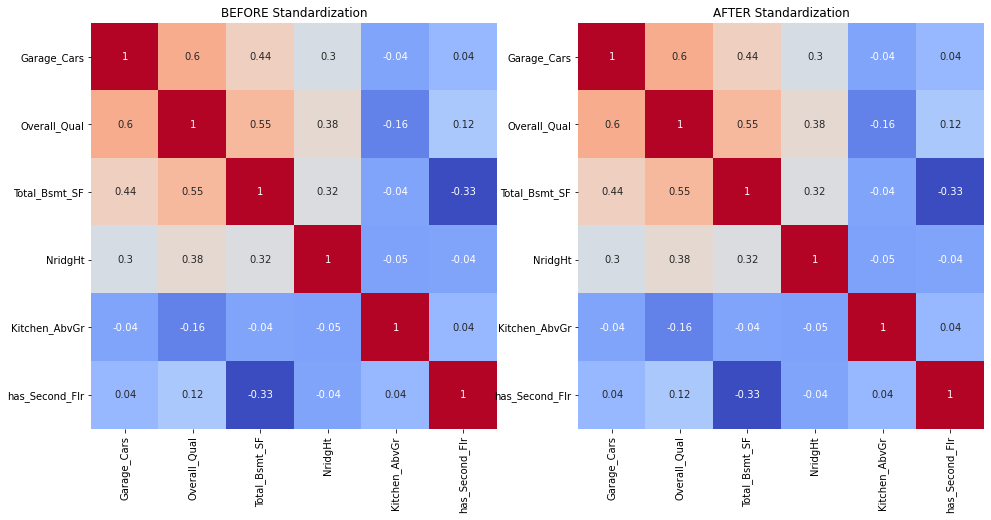

In [67]:
##############################################################################
# Unscaled Dataset
##############################################################################

# subsetting the original dataset
housing_subset = housing_data.loc[ : , ['Garage_Cars',
                                        'Overall_Qual',
                                        'Total_Bsmt_SF',
                                        'NridgHt',
                                        'Kitchen_AbvGr',
                                        'has_Second_Flr']]


# UNSCALED correlation matrix
df_corr = housing_subset.corr().round(2)


# setting figure size and plot window
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(1, 2, 1)


# heatmap of UNSCALED correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False) # surpressing the color bar)



##############################################################################
# Scaled Dataset
##############################################################################

# SCALED correlation matrix
df_scaled_corr = X_scaled_df.loc[ : , ['Garage_Cars',
                                       'Overall_Qual',
                                       'Total_Bsmt_SF',
                                       'NridgHt',
                                       'Kitchen_AbvGr',
                                       'has_Second_Flr']].corr().round(2)


# titling the plot
plt.title("BEFORE Standardization")


# setting plot window
plt.subplot(1, 2, 2)


# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False) # surpressing the color bar


# titling the plot
plt.title("AFTER Standardization")
plt.savefig('./analysis_images/Corrplots Before and After Scaling.png')
plt.show()

In [68]:
# this is the exact code we were using before
X_test, X_train,y_test, y_train = train_test_split(
            housing_data,
            housing_target,
            test_size = 0.25,
            random_state = 219)

In [69]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.5442
KNN Train-Test Gap: 0.4558


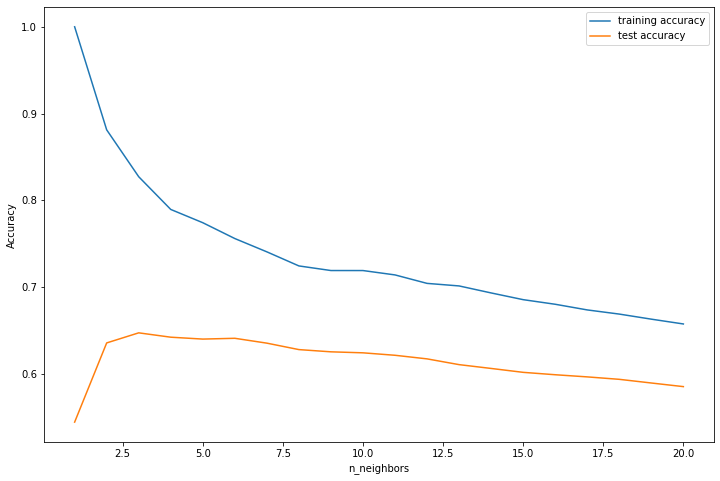

In [70]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [71]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 3


In [72]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(X_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.8271
KNN Testing Score : 0.6471
KNN Train-Test Gap: 0.18


In [73]:
# this is the exact code we were using before
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            housing_target,
            test_size = 0.25,
            random_state = 219)

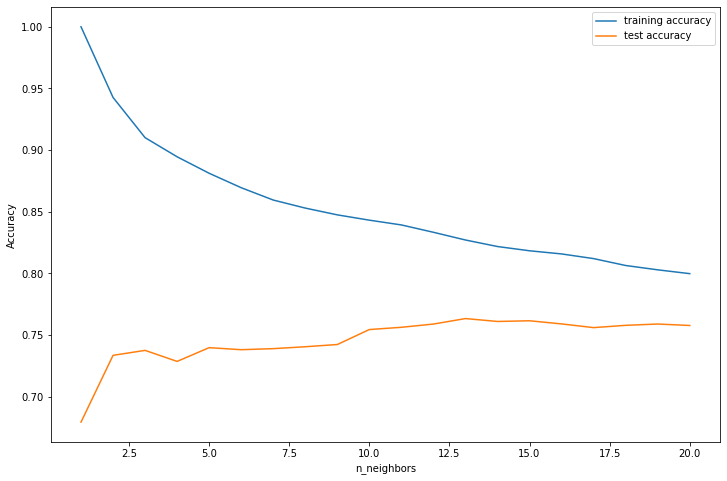

The optimal number of neighbors is 13


In [74]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [75]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = 13)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train, y_train).round(4))
print('KNN Testing Score :', knn_stand.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.7012
KNN Testing Score : 0.6105
KNN Train-Test Gap: 0.0907


In [76]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      14            {knn_opt_score_train}            {knn_opt_score_test}
Standardized          19            {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA", " NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             1.0              0.5442
Non-Standardized      14            0.8271            0.6471
Standardized          19            0.7012           0.6105



In [77]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)

# sending model results to Excel
total_performance.to_excel('./datasets/linear_model_performance.xlsx',
                           index = False)


# checking the results
total_performance

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.8534,0.8596,0.0062,27,"[('intercept', 31784.48), ('Garage_Cars', 0.53..."
1,Lasso,0.8533,0.8591,0.0058,56,"[('intercept', 32837.09), ('Lot_Area', 0.54), ..."
2,ARD,0.8443,0.8443,0.0000,61,"[('intercept', -43282.8), ('Lot_Area', 0.60066..."
0,KNN_Not_Standardized,1.0000,0.5442,0.4558,NA,NA
1,KNN_Not_Standardized_Opt,0.8271,0.6471,0.1800,NA,NA
2,KNN_Standardized_Opt,0.7012,0.6105,0.0907,NA,NA
